# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:53: DeprecationWarning: jax.core.Shape is deprecated. Use Shape = Sequence[int | Any].
  Shape = jax.core.Shape
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/chex/_src/pytypes.py:54: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.issubdtype(arr.dtype, jax.dtypes.prng_key) for runtime detection of typed prng keys (i.e. keys created with jax.random.key).
For more information, see https://jax.readthedocs.io/en/latest/jep/9263-typed-keys.html
  PRNGKey = jax.random.KeyArray
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/scib_metrics/_types.py:9: DeprecationWarning: jax.random.KeyArray is deprecated. Use jax.Array for annotations, and jax.dtypes.i

In [2]:
genes = torch.load('../data/temp/vbd8bavn/epoch=17-step=90000.ckpt')['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
   # 'endothelial cell'
]

In [4]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

In [5]:
adata.obs['current'] = "other"
adata.obs.loc[adata.obs['cell_type']=="podocyte", 'current'] = "podocyte"

... storing 'current' as categorical


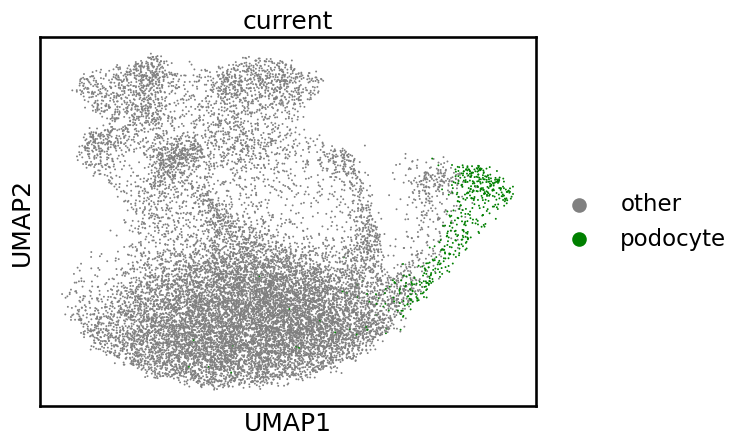

In [6]:
sc.pl.umap(adata, color='current', palette=['grey', 'green'])


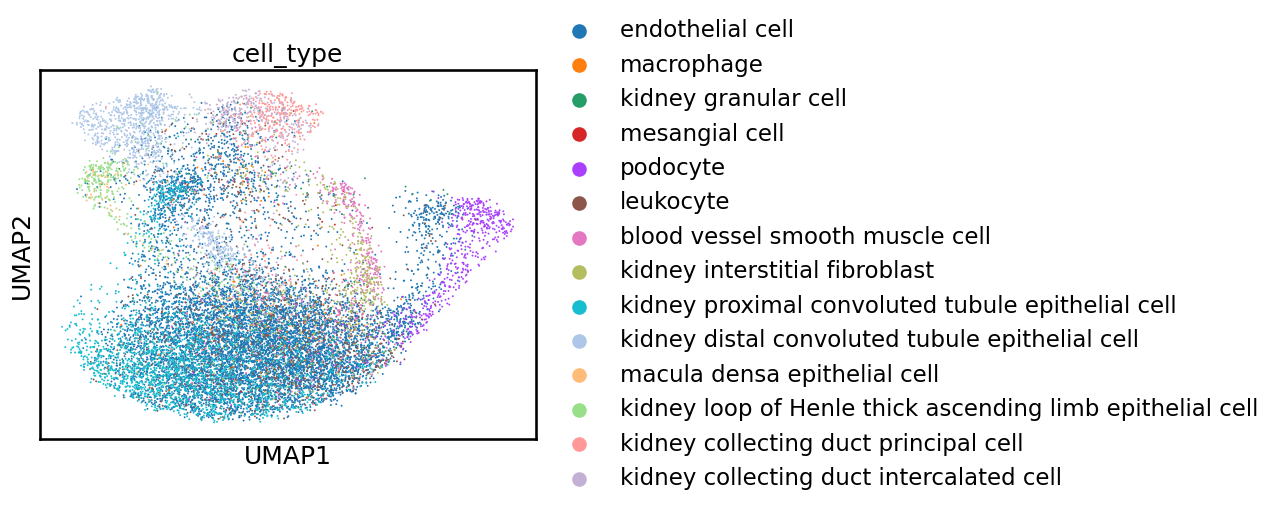

In [7]:
sc.pl.umap(adata, color=['cell_type'])

kidney distal convoluted tubule epithelial cell

View of AnnData object with n_obs × n_vars = 1024 × 4802
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


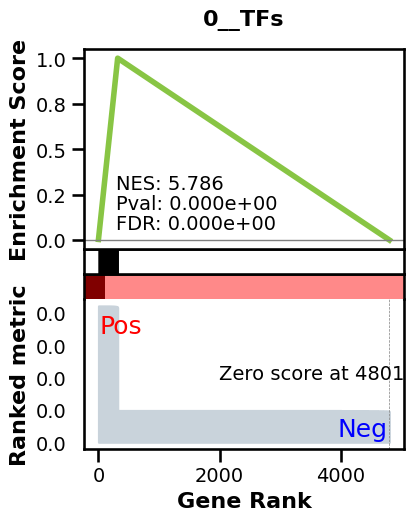

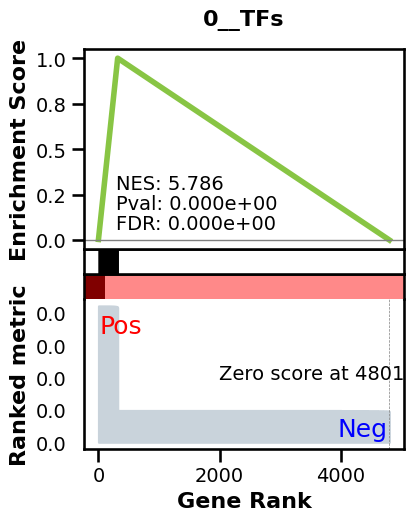

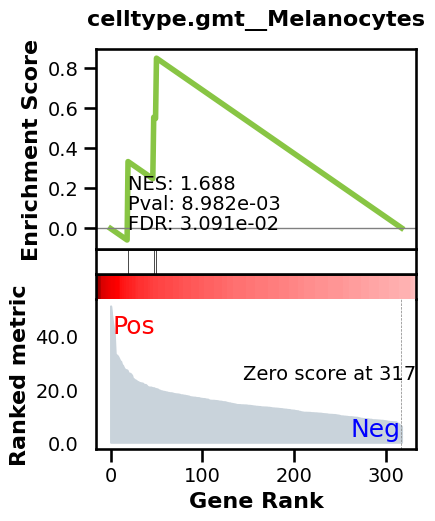

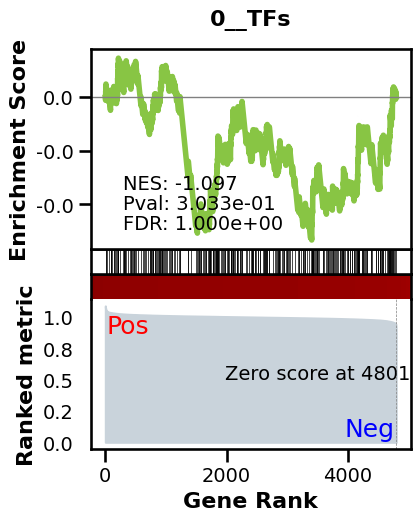

_________________________________________
TF specific enrichment
found some significant results for  9.67741935483871 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3426 genes
intersection pct: 0.7134527280299875
precision:  0.004696999218443849 
recall:  0.3367867514323836 
random precision: 0.001085814360770578


 98%|████████████████████████████████████████████████████████████████████████████████  | 125/128 [00:02<00:00, 43.93it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 44.73it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0025939734220975525
EPR: 5.621543298855217


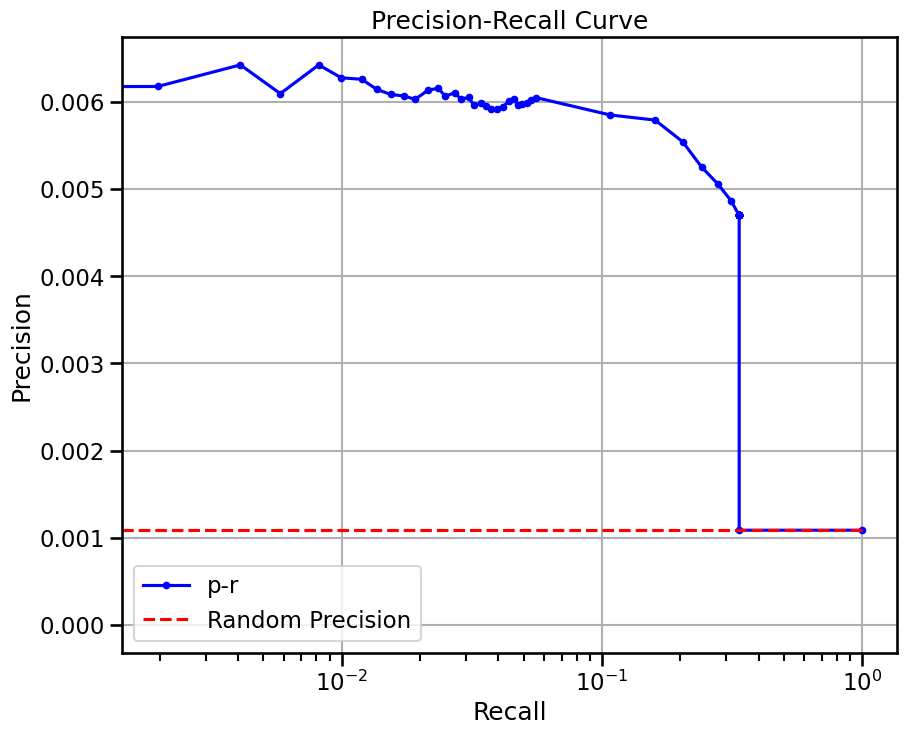

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads
Elapsed time: 445.19 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


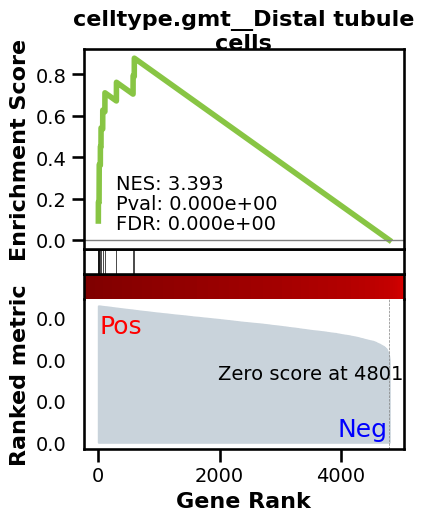

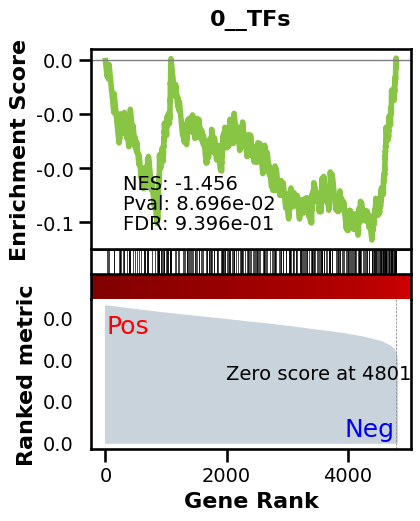

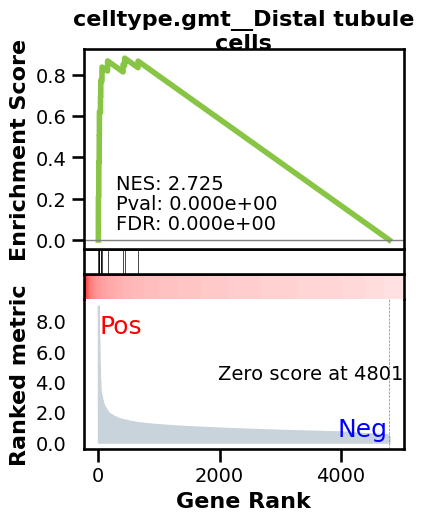

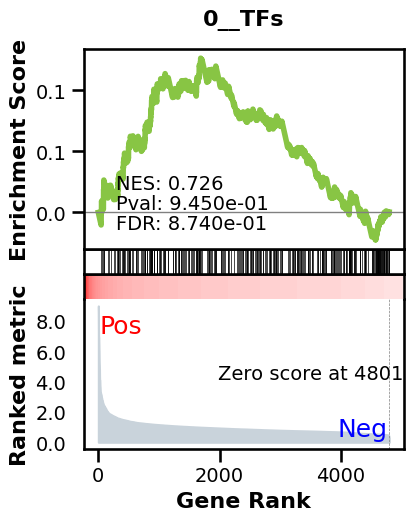

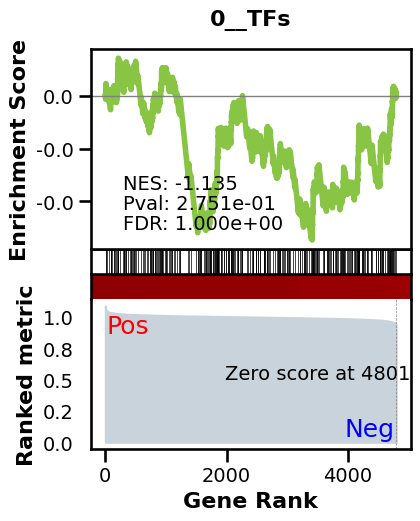

_________________________________________
TF specific enrichment
found some significant results for  6.451612903225806 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3426 genes
intersection pct: 0.7134527280299875
precision:  0.0011338440855519936 
recall:  0.7438976532454281 
random precision: 0.001085814360770578


 98%|████████████████████████████████████████████████████████████████████████████████▋ | 126/128 [00:05<00:00, 22.07it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:05<00:00, 22.24it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0010810473885846028
EPR: 1.4470782460292733


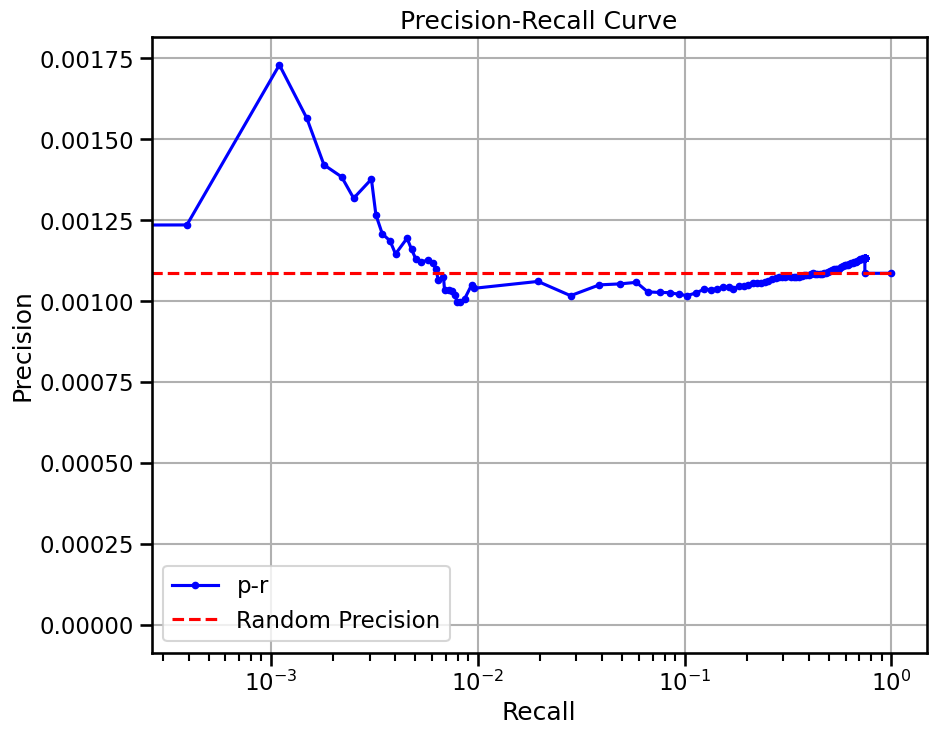

kidney loop of Henle thick ascending limb epithelial cell

View of AnnData object with n_obs × n_vars = 388 × 4745
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_h

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


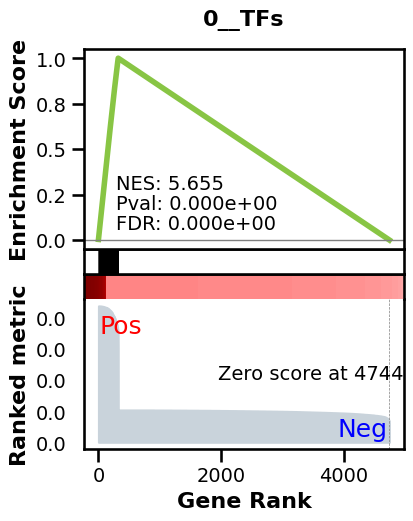

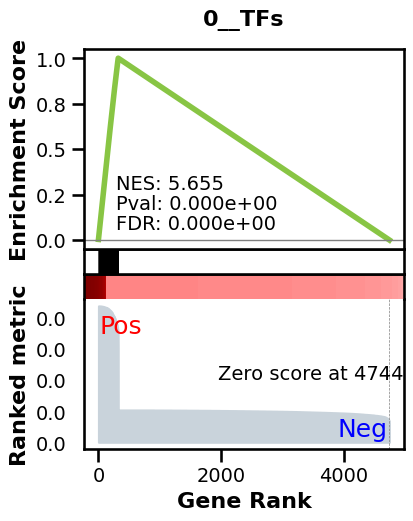

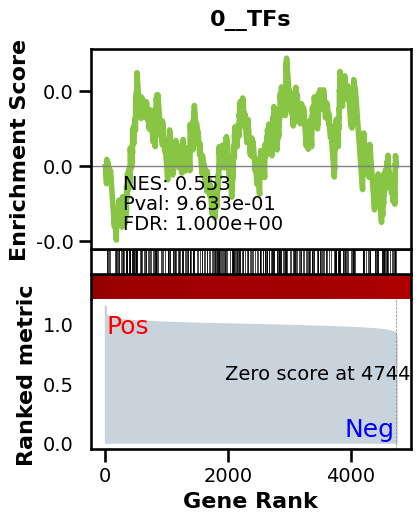

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3339 genes
intersection pct: 0.7036880927291886
precision:  0.006096818149003754 
recall:  0.400489033787789 
random precision: 0.0012108833796207323


 98%|████████████████████████████████████████████████████████████████████████████████▋ | 126/128 [00:05<00:00, 23.71it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:05<00:00, 23.48it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0031797220299725607
EPR: 3.757565779022043


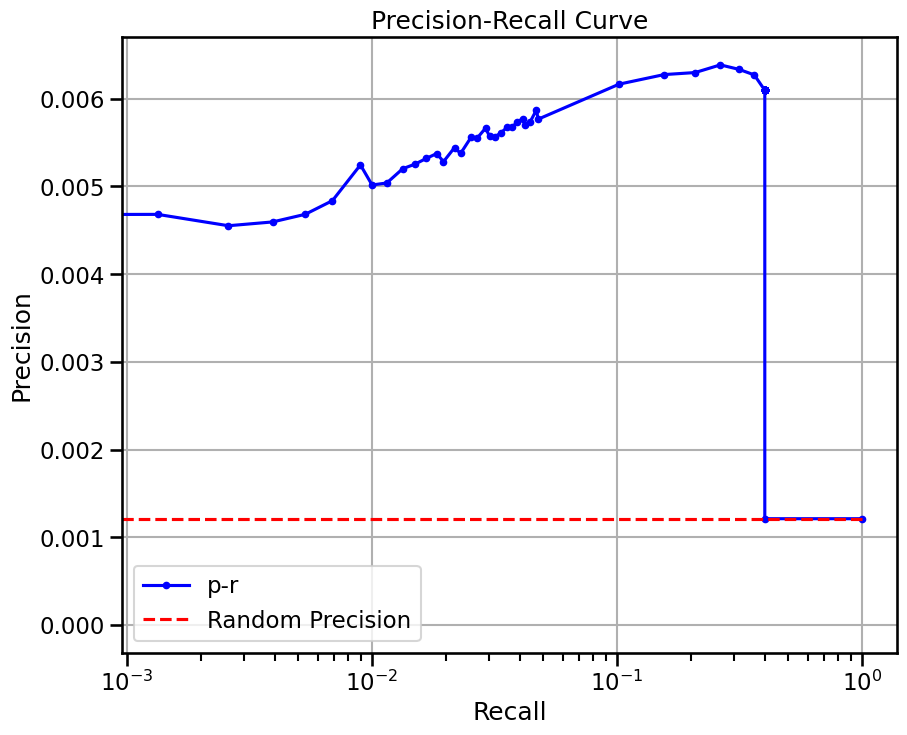

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads
Elapsed time: 127.58 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


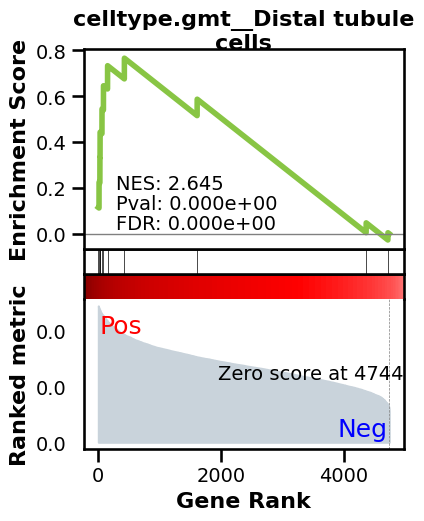

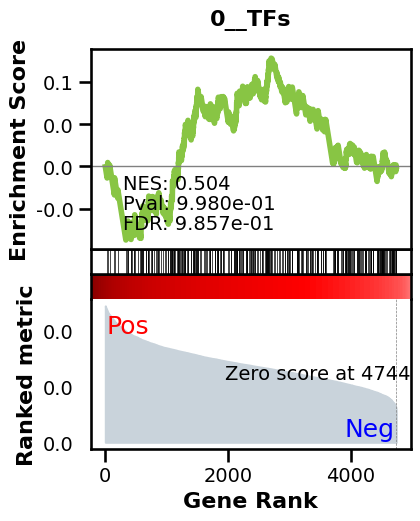

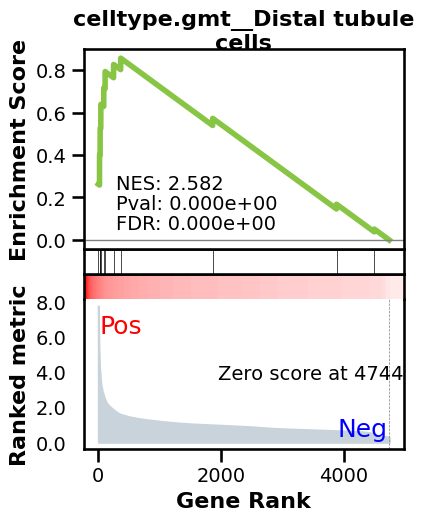

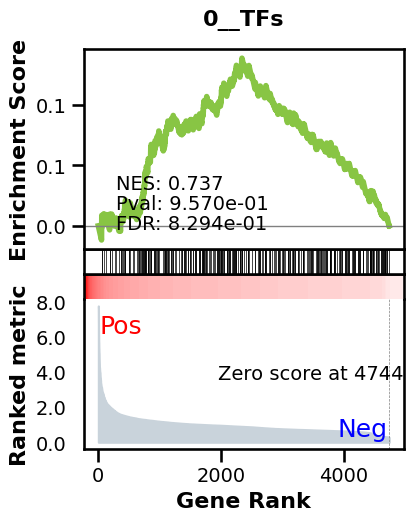

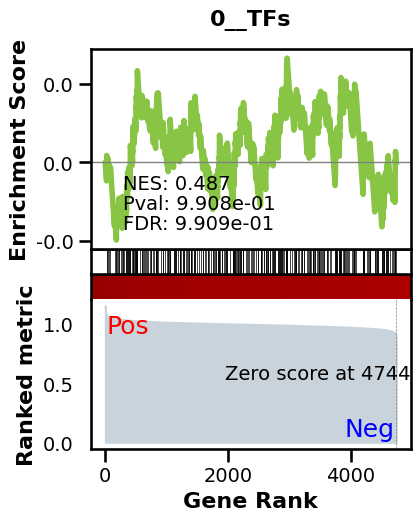

_________________________________________
TF specific enrichment
found some significant results for  5.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3339 genes
intersection pct: 0.7036880927291886
precision:  0.0012864071185889107 
recall:  0.3924866627148785 
random precision: 0.0012108833796207323


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 124/128 [00:03<00:00, 32.52it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:03<00:00, 32.31it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0011907842276438977
EPR: 0.4889279904706824


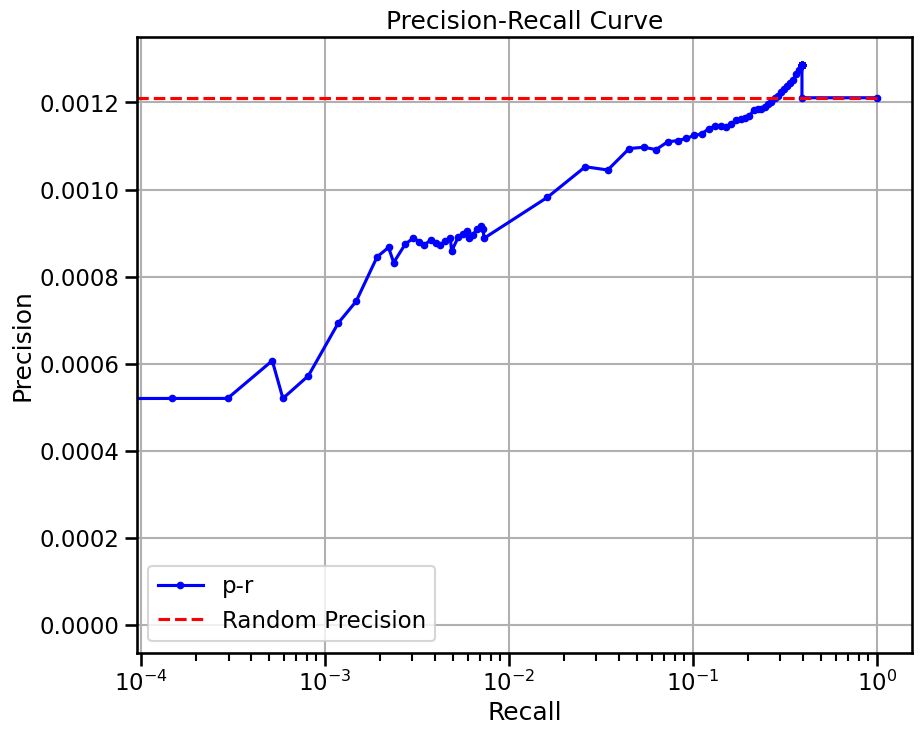

kidney collecting duct principal cell

View of AnnData object with n_obs × n_vars = 455 × 4848
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb',

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


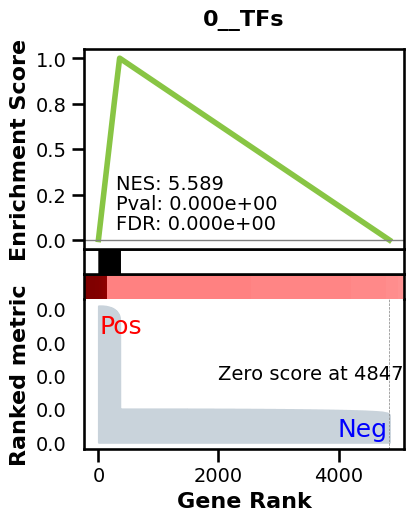

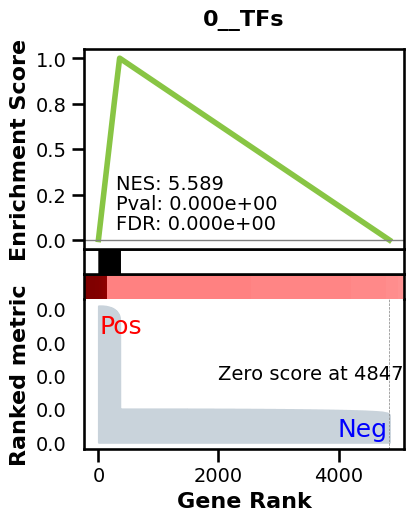

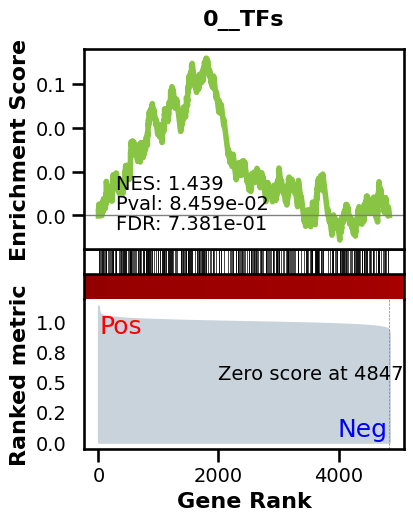

_________________________________________
TF specific enrichment
found some significant results for  5.714285714285714 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3500 genes
intersection pct: 0.721947194719472
precision:  0.007210300757780215 
recall:  0.4418768328445748 
random precision: 0.0013922345159841588


 98%|████████████████████████████████████████████████████████████████████████████████  | 125/128 [00:02<00:00, 43.54it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 43.02it/s]


Area Under Precision-Recall Curve (AUPRC):  0.004970360307690972
EPR: 9.97288644445102


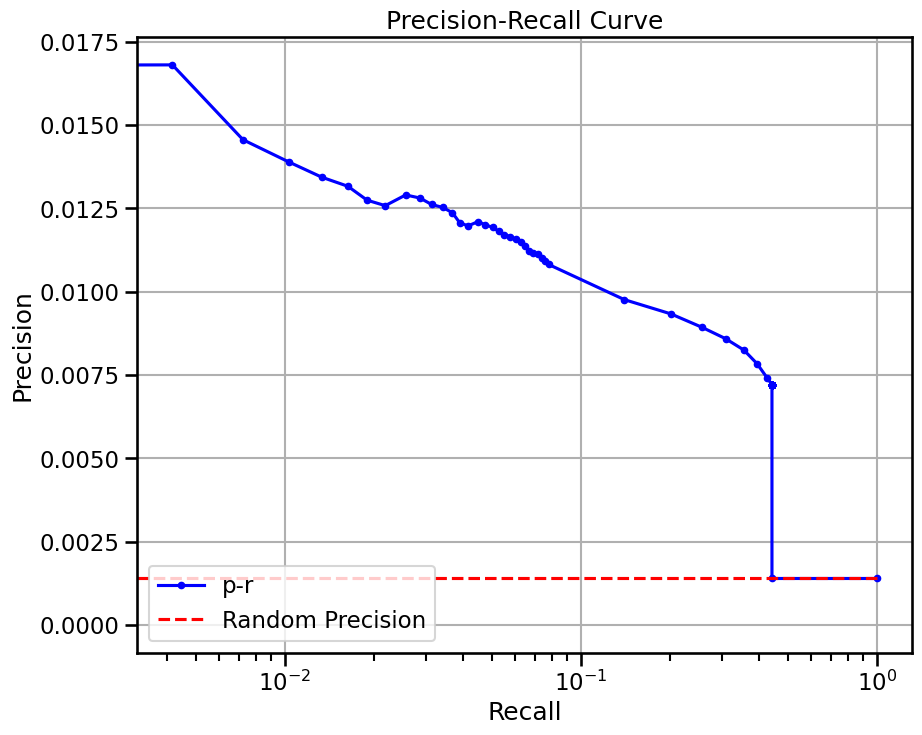

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads
Elapsed time: 113.50 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


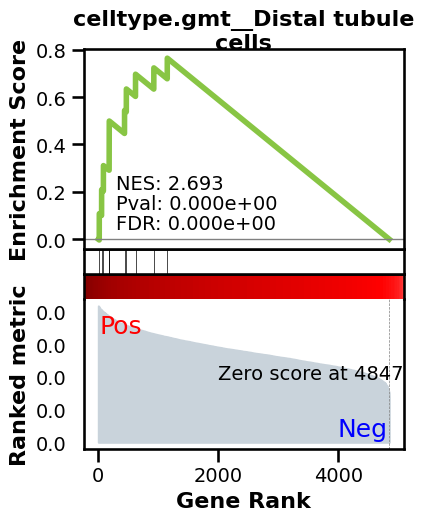

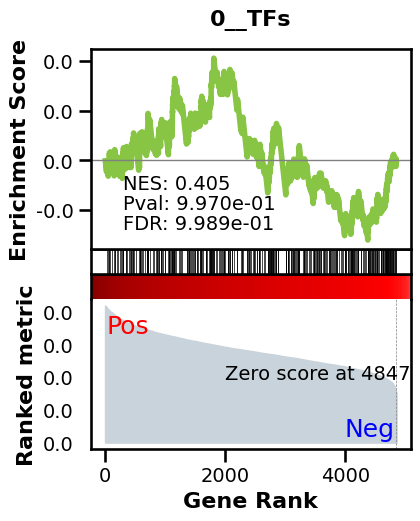

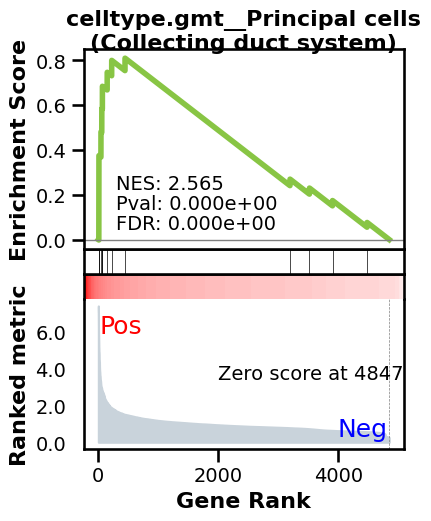

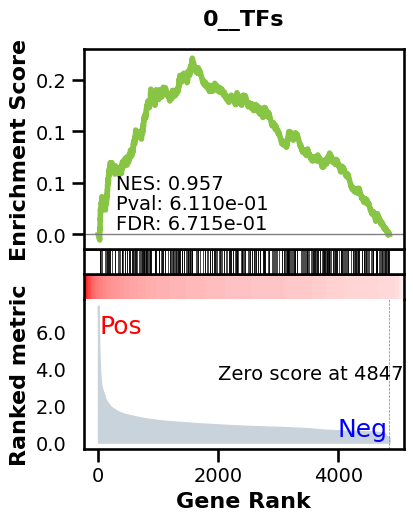

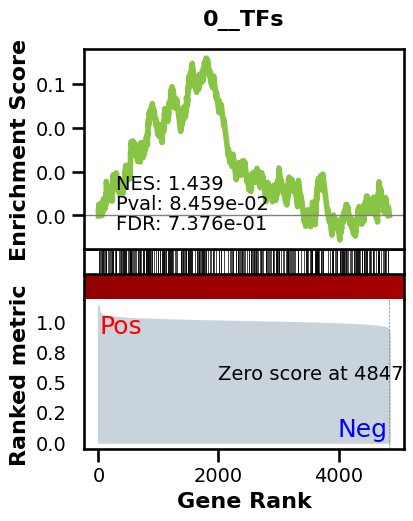

_________________________________________
TF specific enrichment
found some significant results for  1.4285714285714286 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3500 genes
intersection pct: 0.721947194719472
precision:  0.0015563008225078067 
recall:  0.5175366568914956 
random precision: 0.0013922345159841588


 98%|████████████████████████████████████████████████████████████████████████████████  | 125/128 [00:04<00:00, 29.85it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:04<00:00, 29.52it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0014542009463146084
EPR: 1.222446626331616


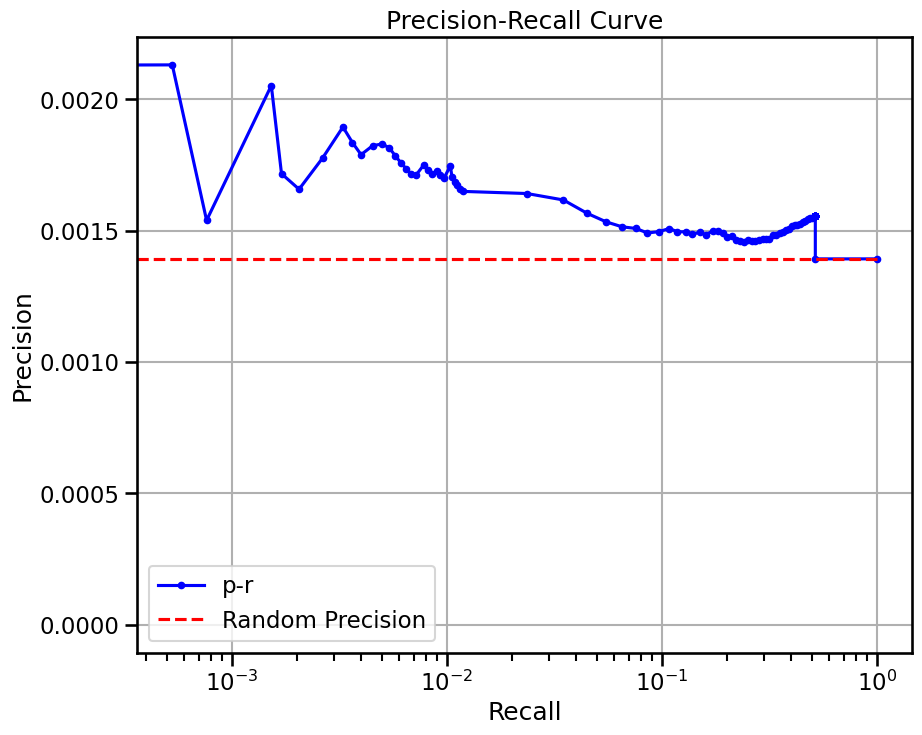

mesangial cell

View of AnnData object with n_obs × n_vars = 10 × 3799
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


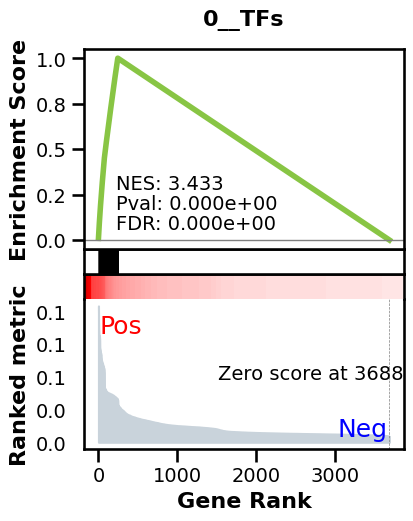

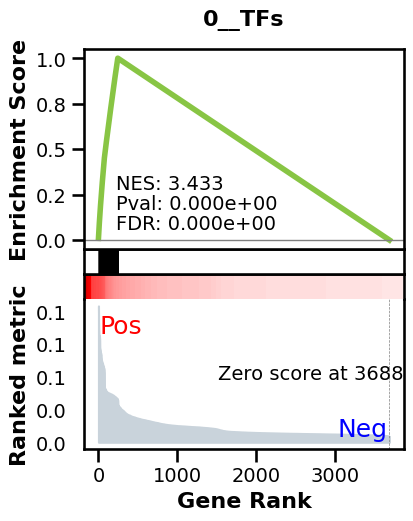

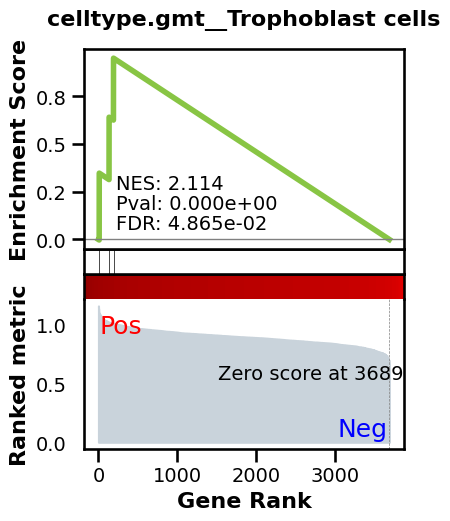

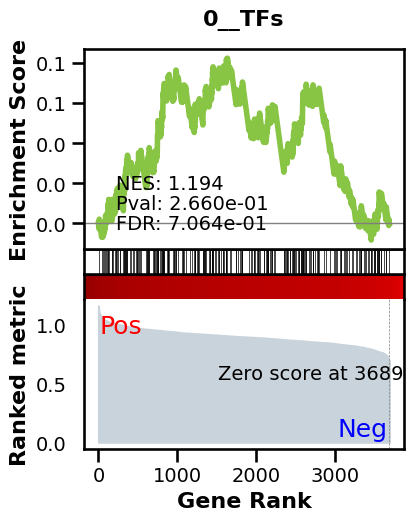

_________________________________________
TF specific enrichment
found some significant results for  4.761904761904762 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.010835770791577845 
recall:  0.17559967864111098 
random precision: 0.0012226661221992553


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 124/128 [00:03<00:00, 37.15it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:03<00:00, 37.03it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0027891924633883258
EPR: 7.436545240633033


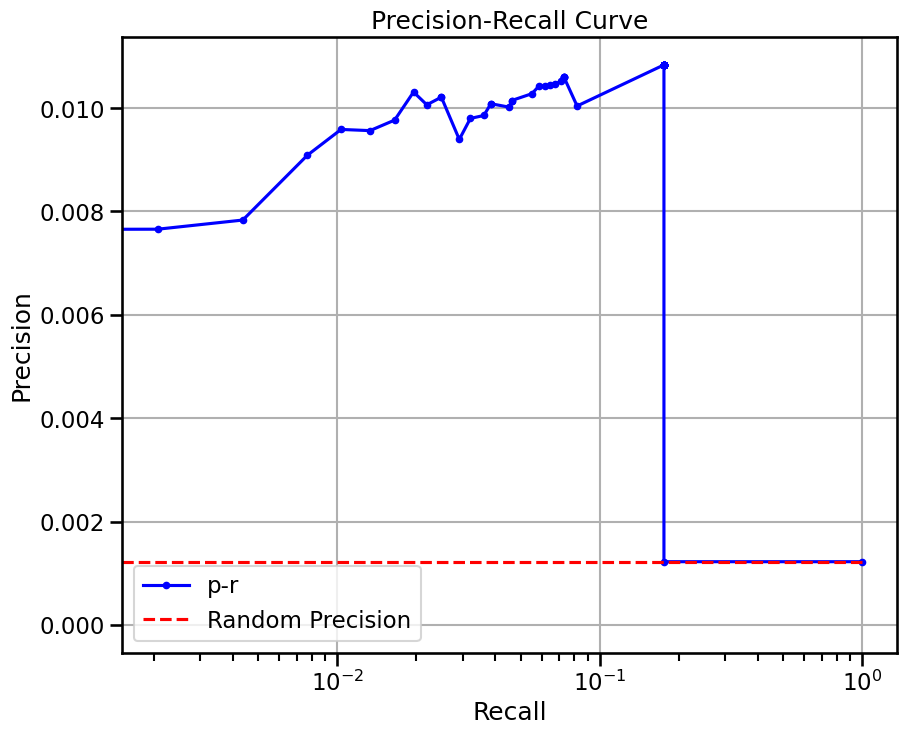

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads
Elapsed time: 38.37 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


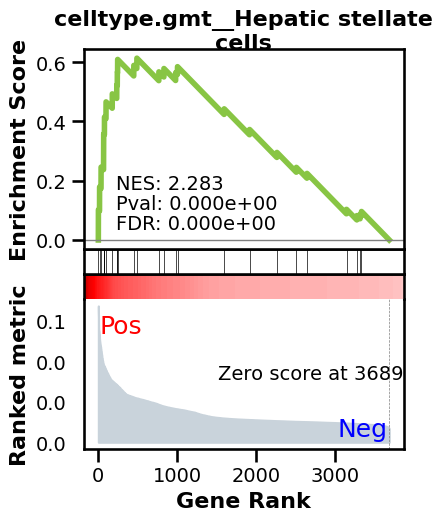

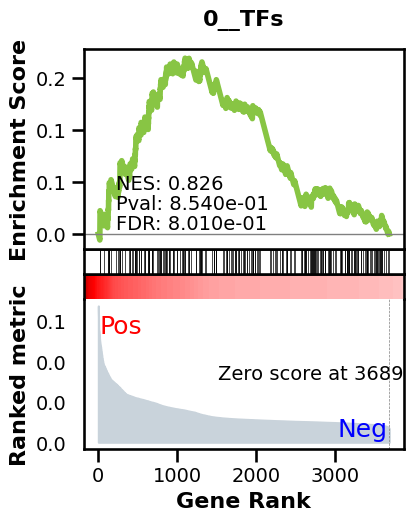

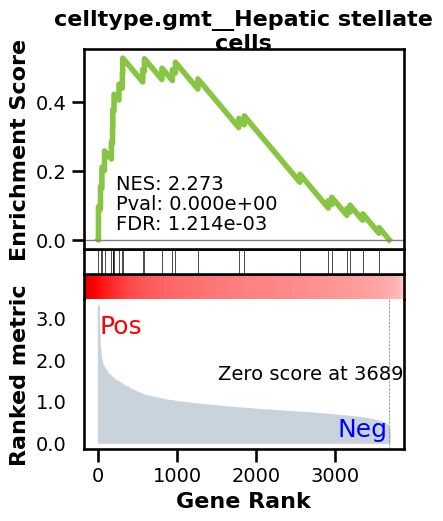

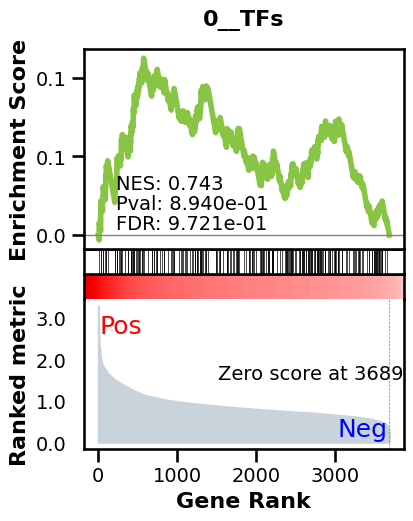

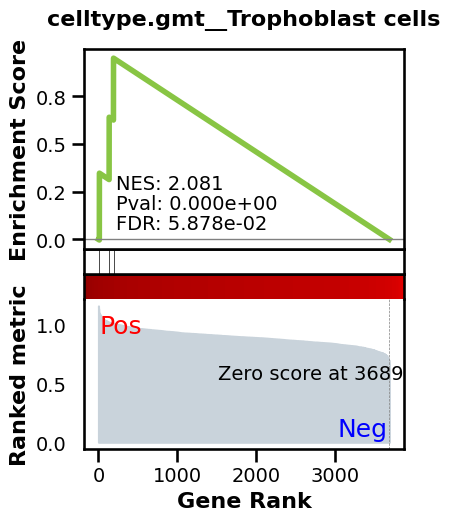

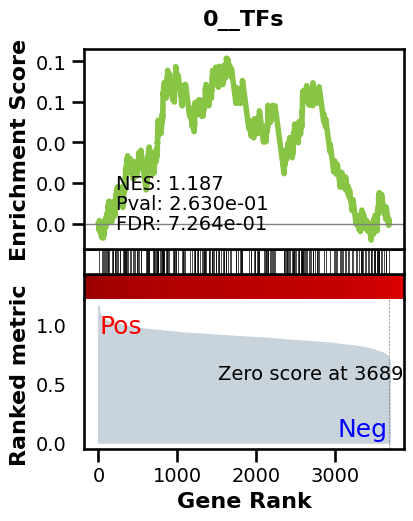

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2670 genes
intersection pct: 0.7235772357723578
precision:  0.001650622225628268 
recall:  0.03213588890164123 
random precision: 0.0012226661221992553


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 124/128 [00:02<00:00, 50.78it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 48.61it/s]


Area Under Precision-Recall Curve (AUPRC):  0.001231820151426514
EPR: 0.8445042408873878


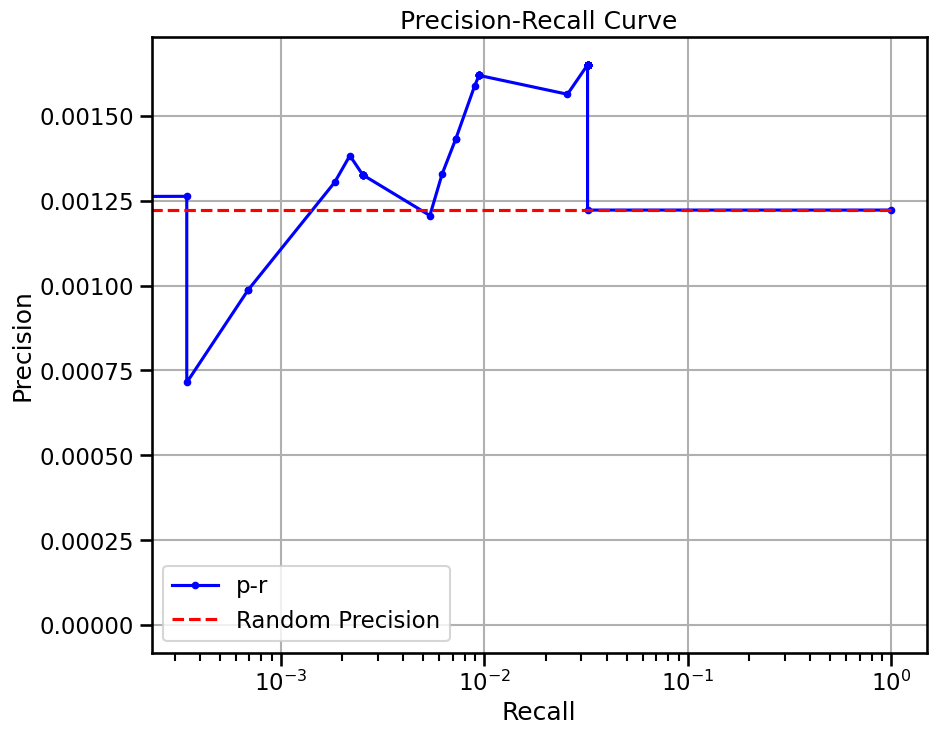

blood vessel smooth muscle cell

View of AnnData object with n_obs × n_vars = 462 × 4402
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outl

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


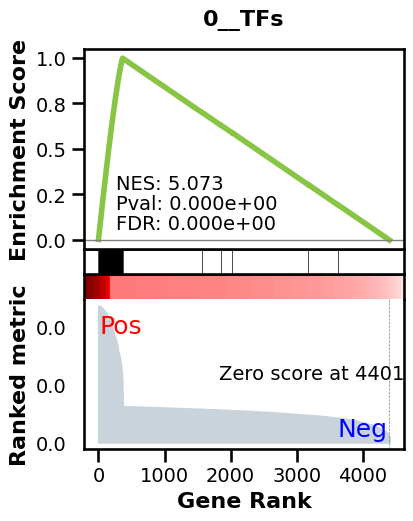

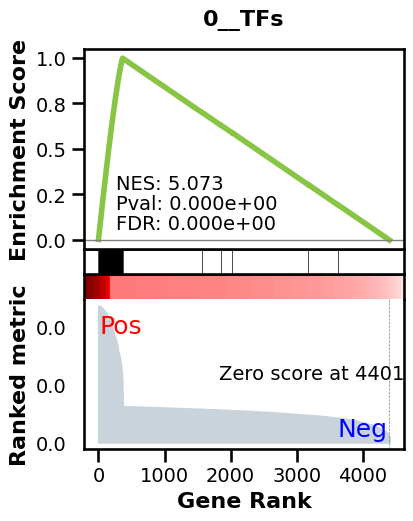

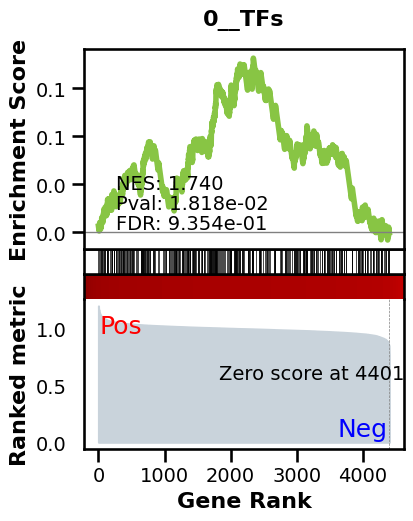

_________________________________________
TF specific enrichment
found some significant results for  1.8867924528301887 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3210 genes
intersection pct: 0.7292139936392549
precision:  0.00803344299697001 
recall:  0.39402703181254795 
random precision: 0.001644809332009176


 98%|████████████████████████████████████████████████████████████████████████████████▋ | 126/128 [00:02<00:00, 52.53it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 52.07it/s]


Area Under Precision-Recall Curve (AUPRC):  0.005064068063443235
EPR: 7.325134988543369


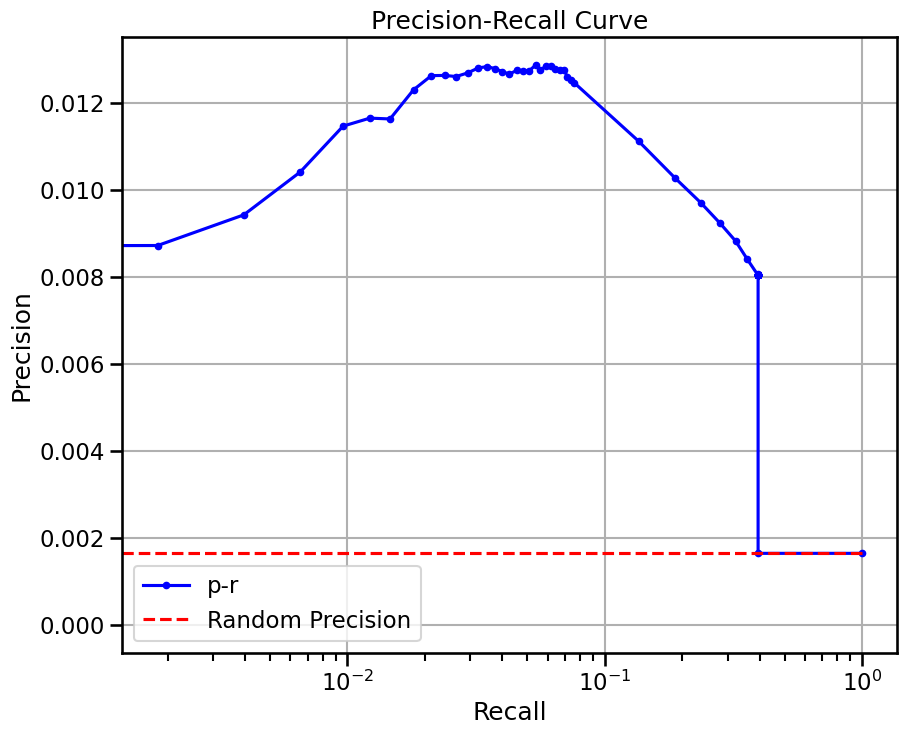

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads
Elapsed time: 61.47 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


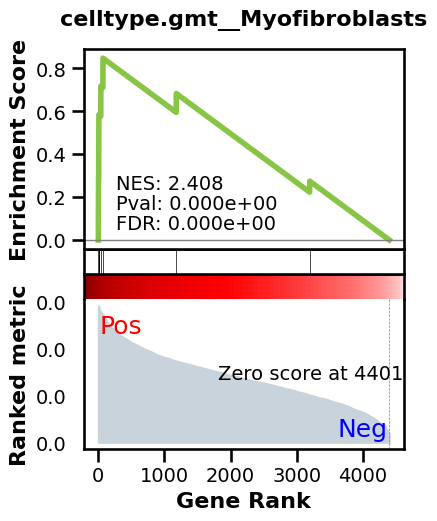

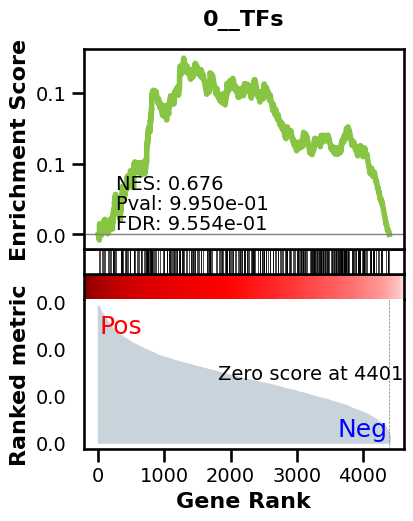

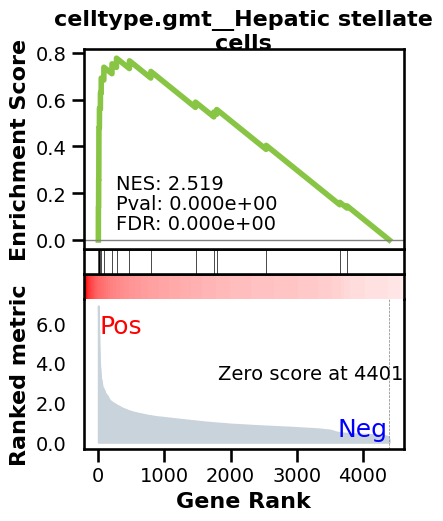

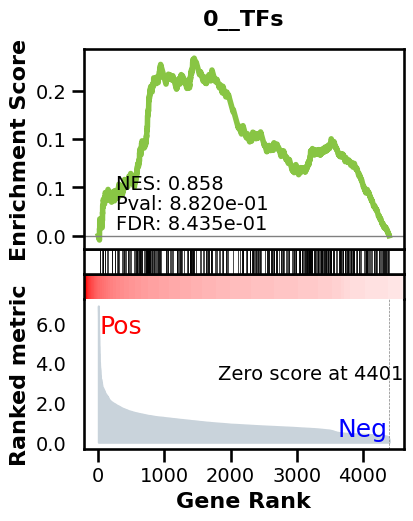

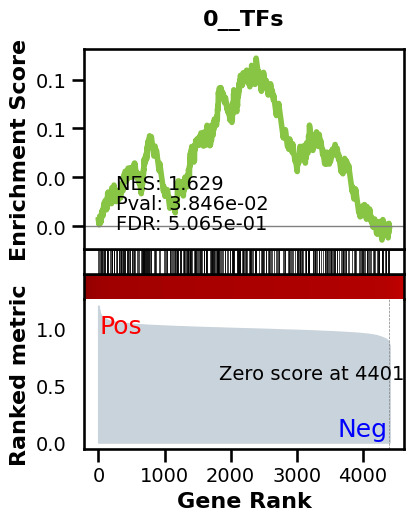

_________________________________________
TF specific enrichment
found some significant results for  3.7735849056603774 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3210 genes
intersection pct: 0.7292139936392549
precision:  0.002170360422759657 
recall:  0.37820928997225994 
random precision: 0.001644809332009176


 98%|████████████████████████████████████████████████████████████████████████████████  | 125/128 [00:02<00:00, 47.69it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 46.97it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0017954275417809897
EPR: 1.0767749837092047


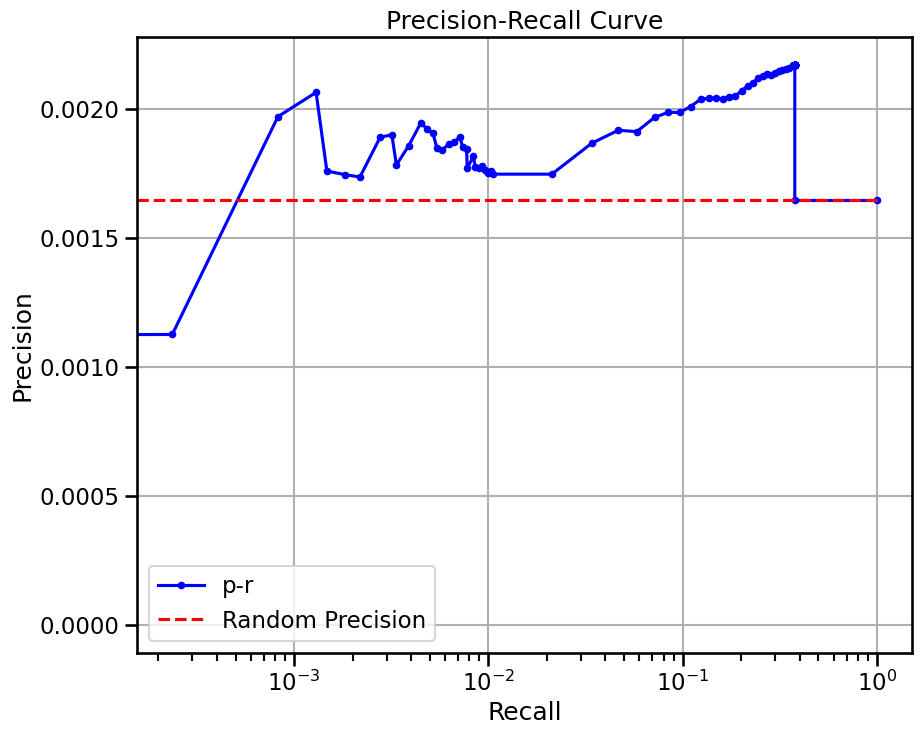

podocyte

View of AnnData object with n_obs × n_vars = 518 × 4839
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'le

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


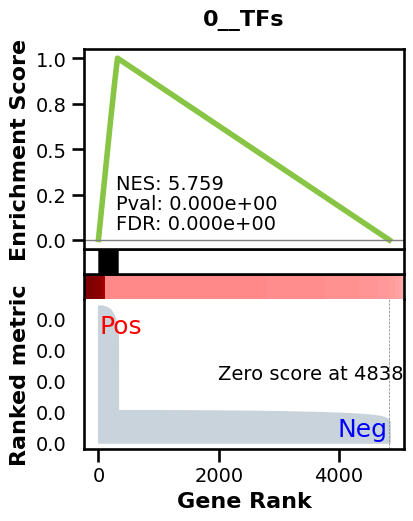

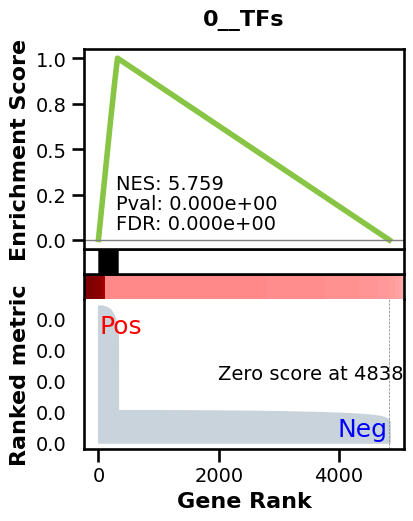

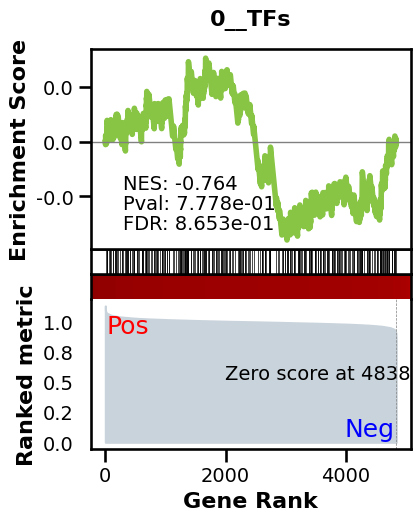

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3487 genes
intersection pct: 0.720603430460839
precision:  0.008828851709578082 
recall:  0.45114367598550803 
random precision: 0.0015213461490683946


 98%|████████████████████████████████████████████████████████████████████████████████  | 125/128 [00:02<00:00, 44.77it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 44.76it/s]


Area Under Precision-Recall Curve (AUPRC):  0.004949558738935585
EPR: 6.062939392394037


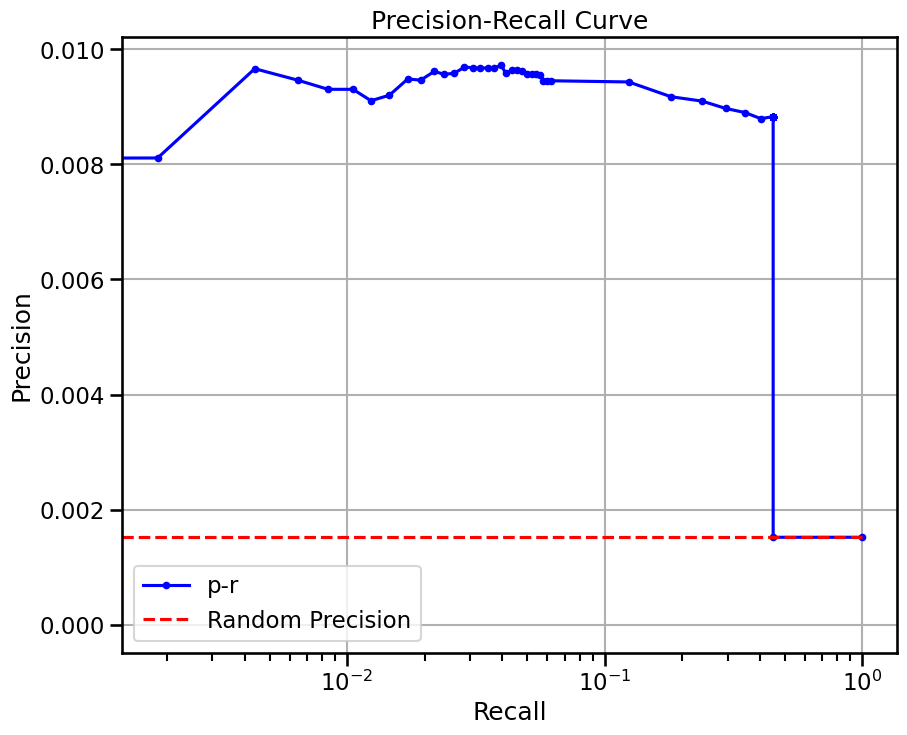

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads
Elapsed time: 155.61 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


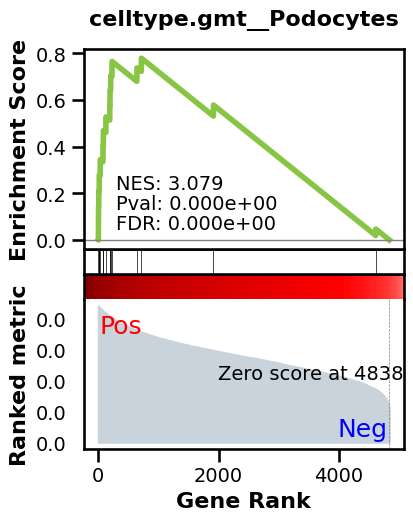

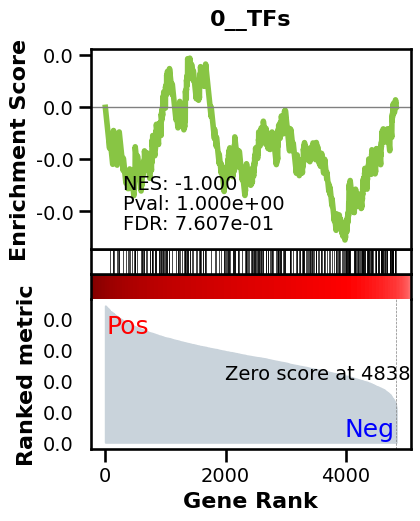

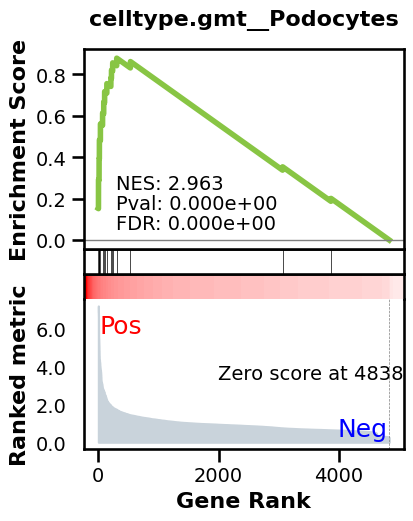

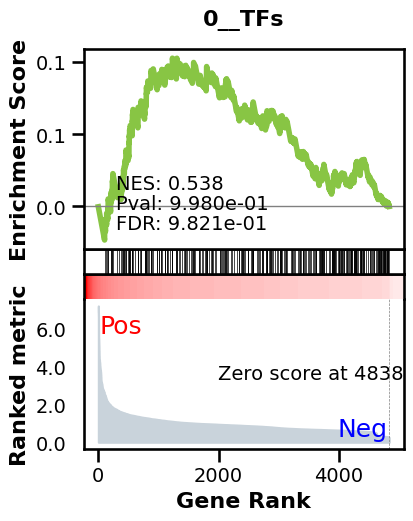

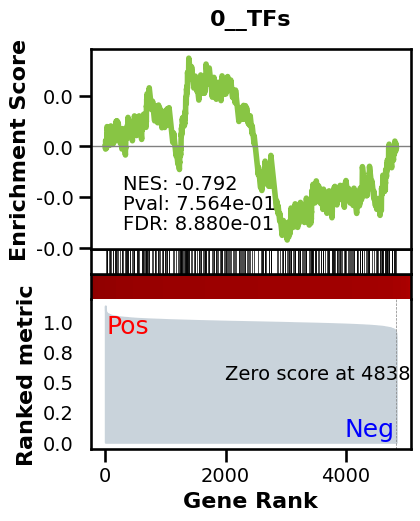

_________________________________________
TF specific enrichment
found some significant results for  6.382978723404255 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3487 genes
intersection pct: 0.720603430460839
precision:  0.0016754672464333556 
recall:  0.4709349483588385 
random precision: 0.0015213461490683946


 98%|████████████████████████████████████████████████████████████████████████████████▋ | 126/128 [00:05<00:00, 20.28it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:05<00:00, 21.40it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0015452488359582817
EPR: 0.9952135996343812


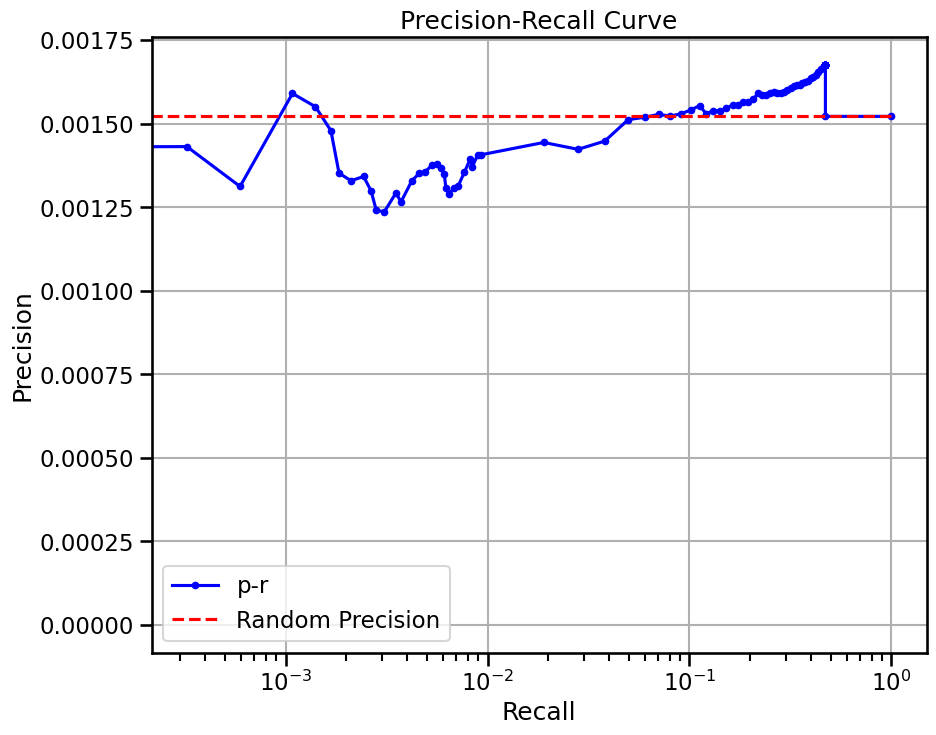

macrophage

View of AnnData object with n_obs × n_vars = 88 × 4403
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'l

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


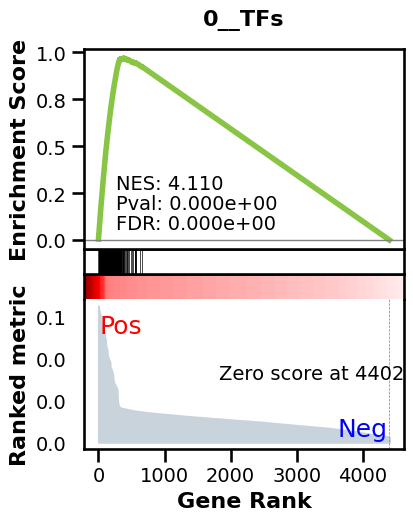

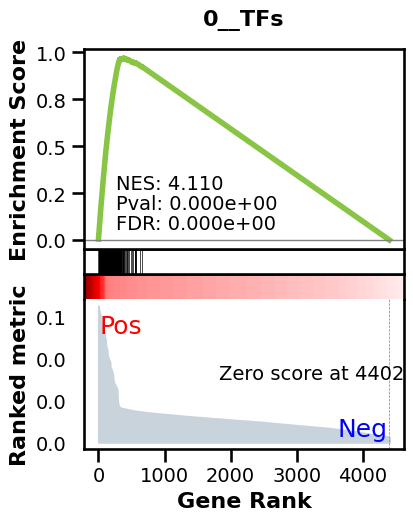

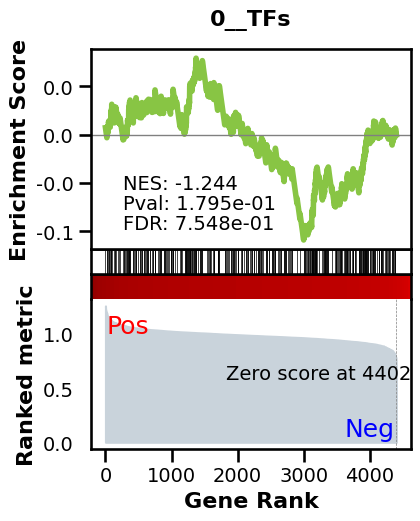

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3152 genes
intersection pct: 0.7158755394049512
precision:  0.009730416856577754 
recall:  0.3344832542762685 
random precision: 0.001400933069350315


 98%|████████████████████████████████████████████████████████████████████████████████  | 125/128 [00:02<00:00, 54.71it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 51.31it/s]


Area Under Precision-Recall Curve (AUPRC):  0.004367298291411823
EPR: 6.882897423762655


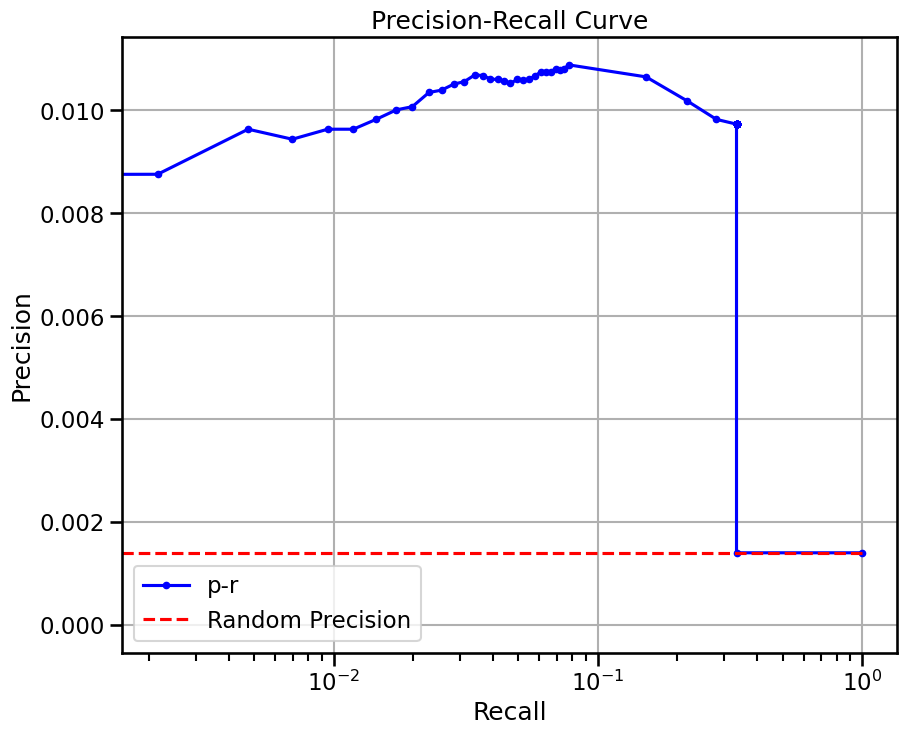

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads
Elapsed time: 28.45 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


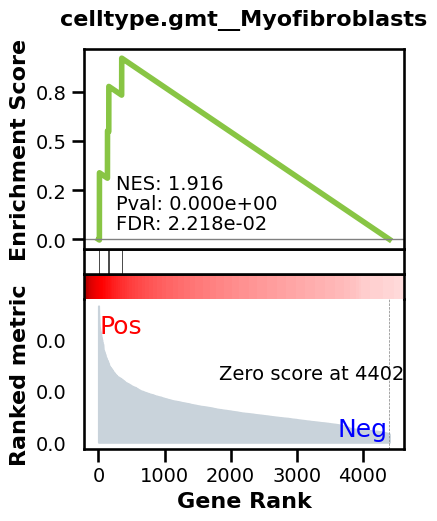

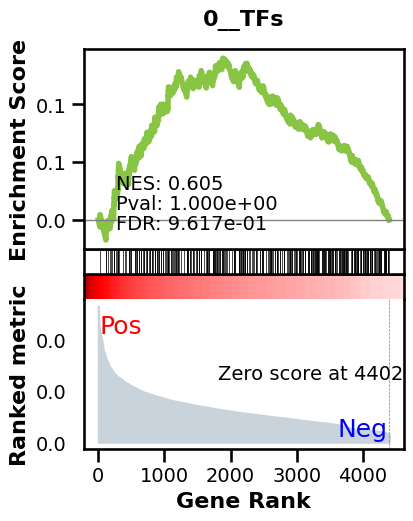

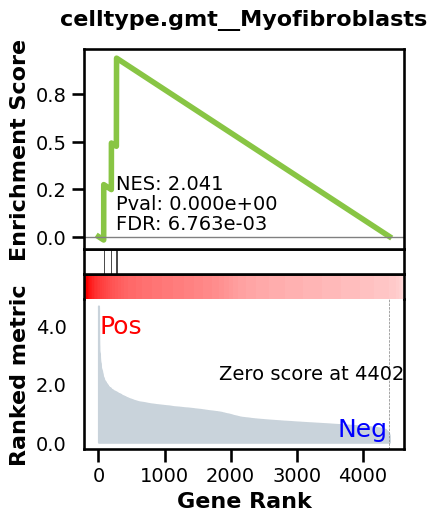

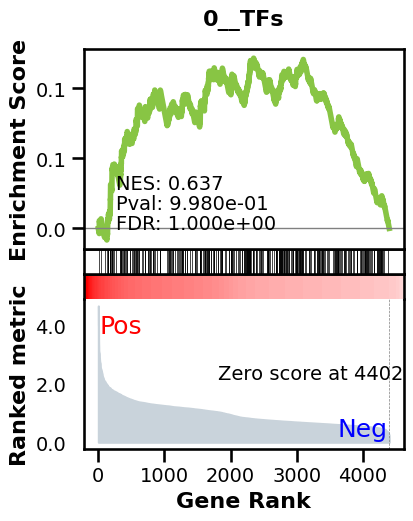

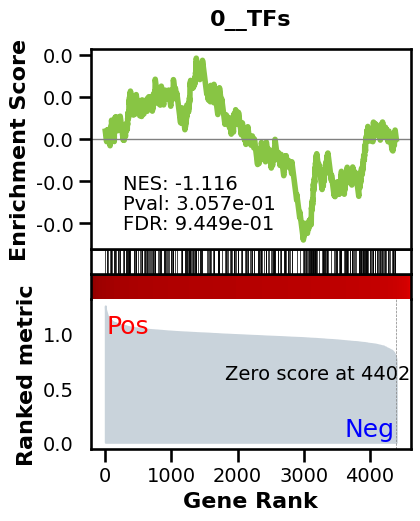

_________________________________________
TF specific enrichment
found some significant results for  4.878048780487805 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3152 genes
intersection pct: 0.7158755394049512
precision:  0.0018080683042540823 
recall:  0.1052896363375018 
random precision: 0.001400933069350315


 98%|████████████████████████████████████████████████████████████████████████████████▋ | 126/128 [00:02<00:00, 55.02it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:02<00:00, 54.70it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0014280369027531005
EPR: 1.0775668273061396


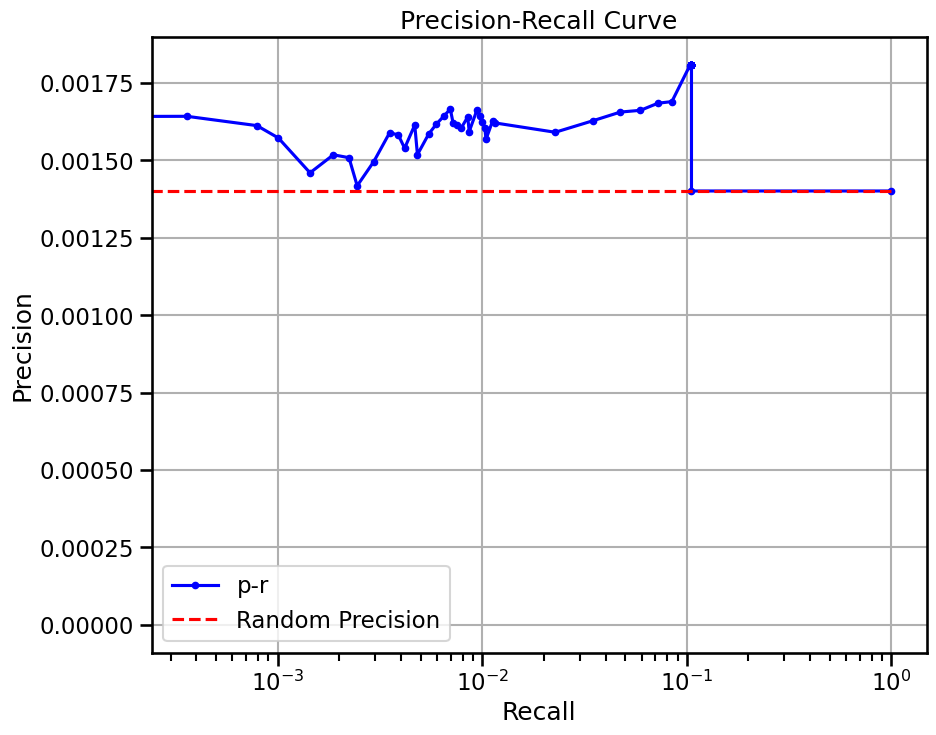

leukocyte

View of AnnData object with n_obs × n_vars = 996 × 2766
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'l

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


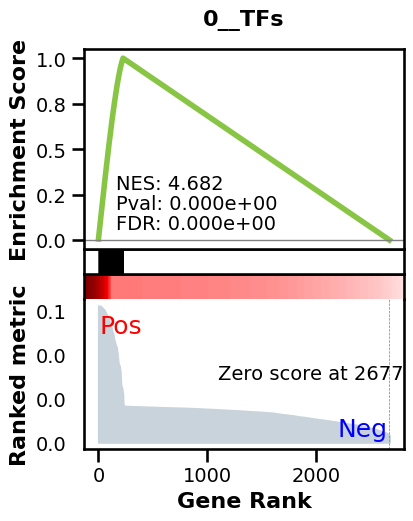

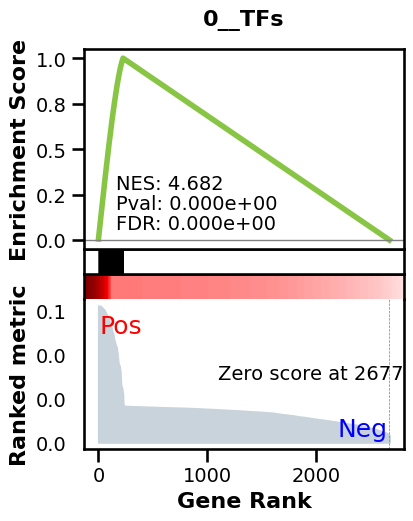

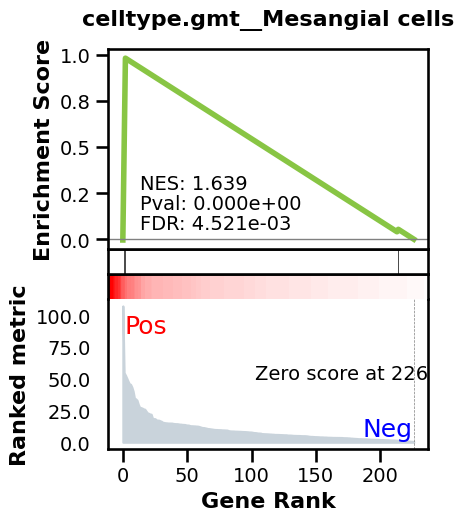

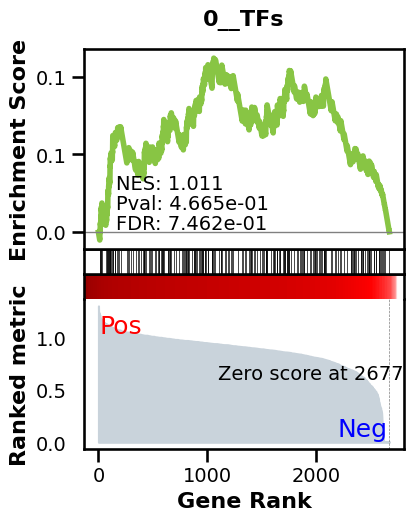

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.007869953288275238 
recall:  0.43089960886571055 
random precision: 0.001419581713862669


 97%|███████████████████████████████████████████████████████████████████████████████▍  | 124/128 [00:01<00:00, 78.36it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.70it/s]


Area Under Precision-Recall Curve (AUPRC):  0.005624994031814623
EPR: 13.961202179248767


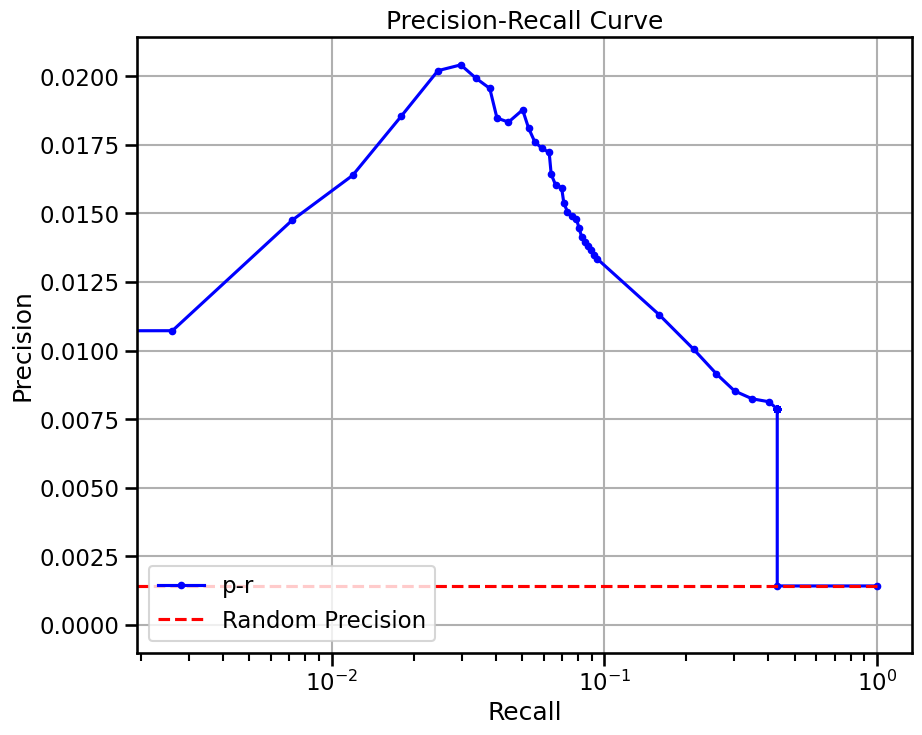

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads
Elapsed time: 62.16 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


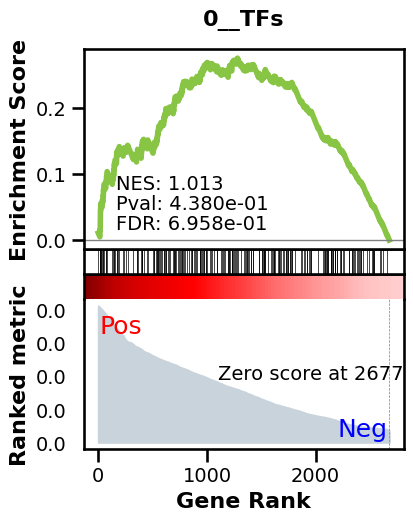

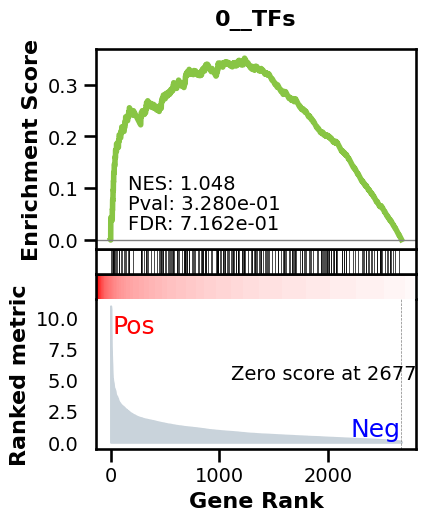

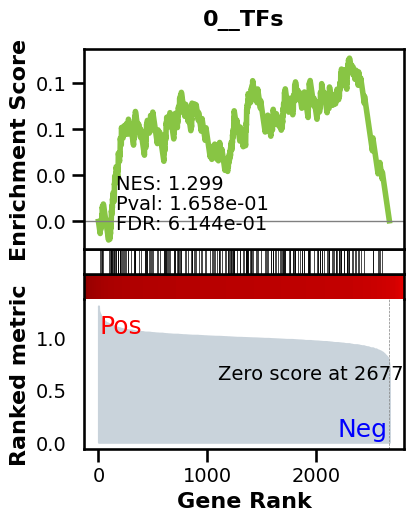

_________________________________________
TF specific enrichment
found some significant results for  10.526315789473685 % TFs

_________________________________________
loading GT,  omnipath
intersection of 1801 genes
intersection pct: 0.6725168035847647
precision:  0.0018794327734336072 
recall:  0.2909604519774011 
random precision: 0.001419581713862669


 94%|████████████████████████████████████████████████████████████████████████████▉     | 120/128 [00:01<00:00, 78.47it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:01<00:00, 77.38it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0016709552837108337
EPR: 1.3791206423656366


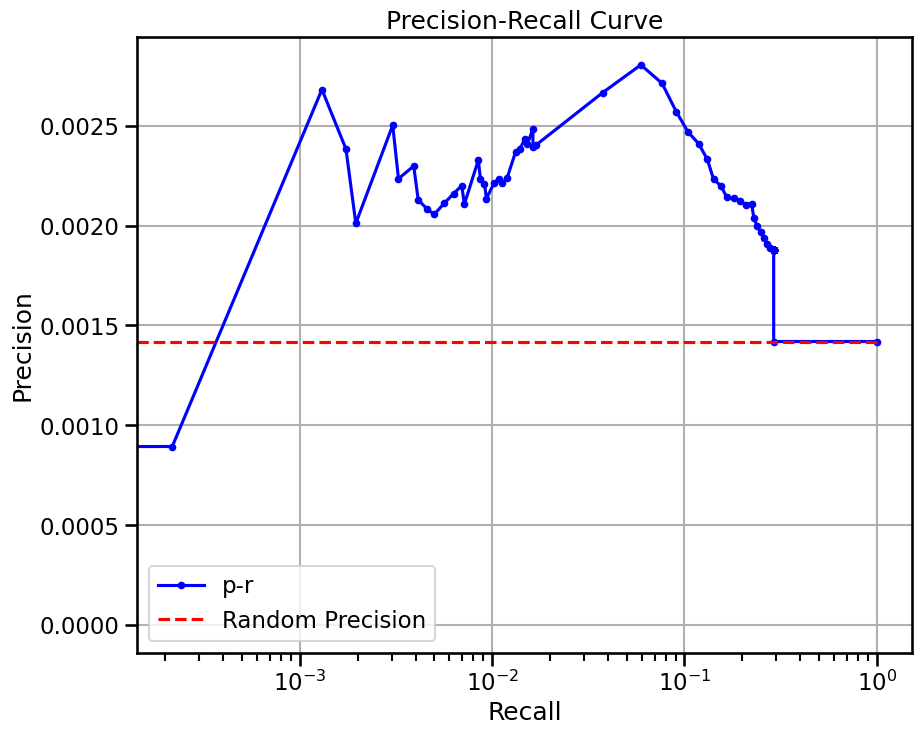

kidney interstitial fibroblast

View of AnnData object with n_obs × n_vars = 468 × 4008
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outli

/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


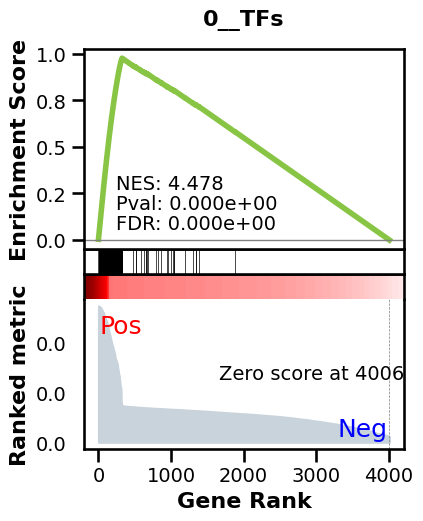

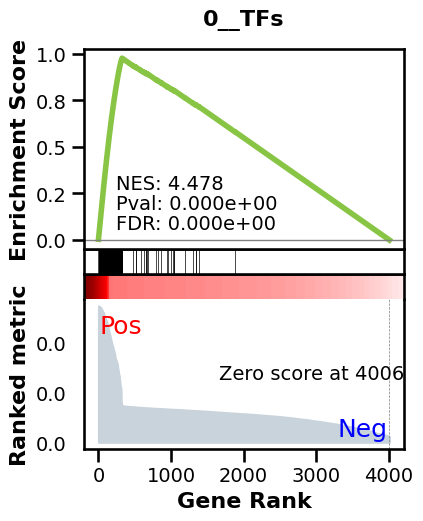

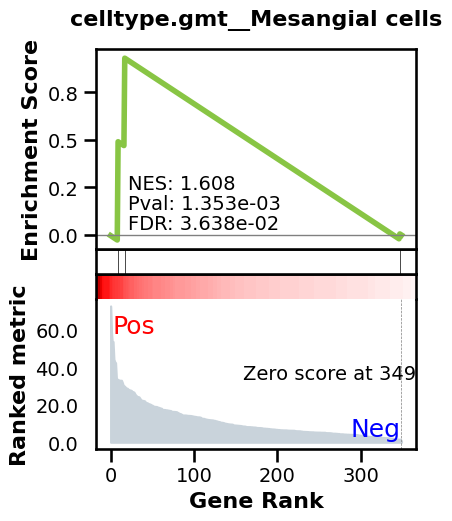

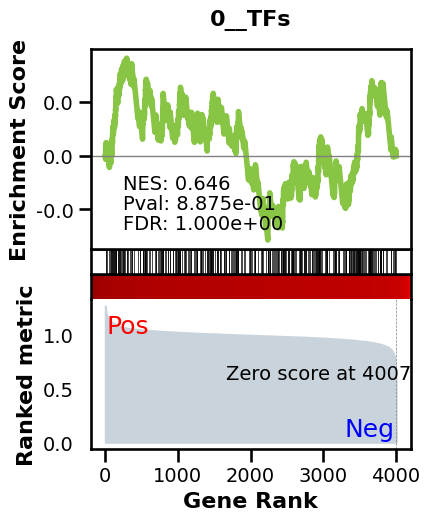

_________________________________________
TF specific enrichment
found some significant results for  6.976744186046512 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2862 genes
intersection pct: 0.7140718562874252
precision:  0.00936012995537572 
recall:  0.4071493486822175 
random precision: 0.0016125679668576004


 99%|█████████████████████████████████████████████████████████████████████████████████▎| 127/128 [00:04<00:00, 28.37it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:04<00:00, 29.25it/s]


Area Under Precision-Recall Curve (AUPRC):  0.006198665600402918
EPR: 8.167461552673855


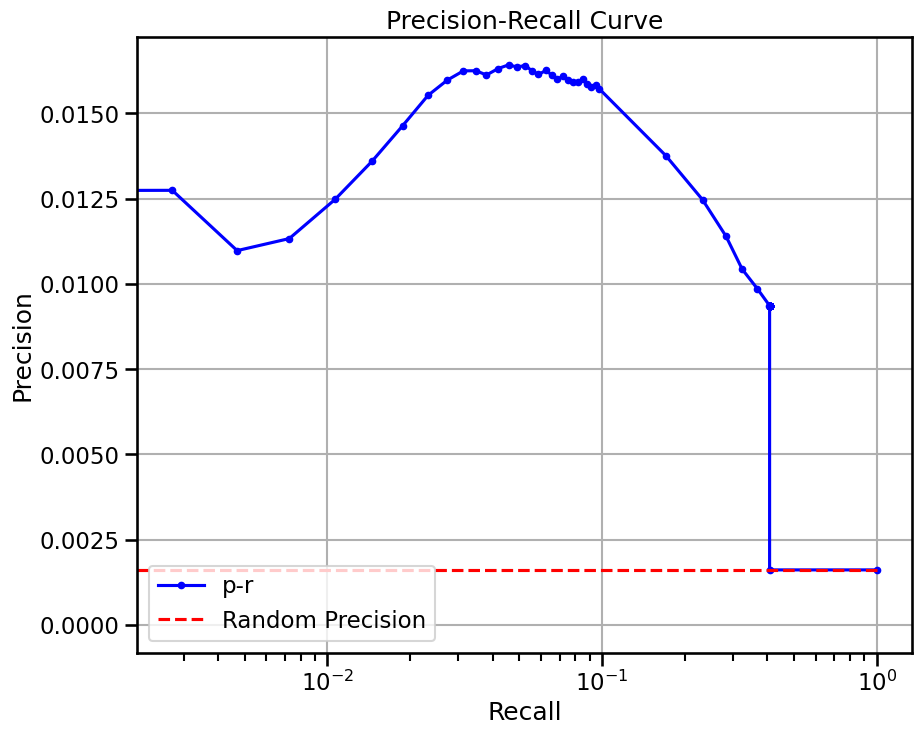

Tree method: RF
K: sqrt
Number of trees: 100


running jobs on 20 threads
Elapsed time: 78.51 seconds


/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/multiprocessing/pool.py:265: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=20>
  _warn(f"unclosed running multiprocessing pool {self!r}",


base enrichment
Top central genes: []


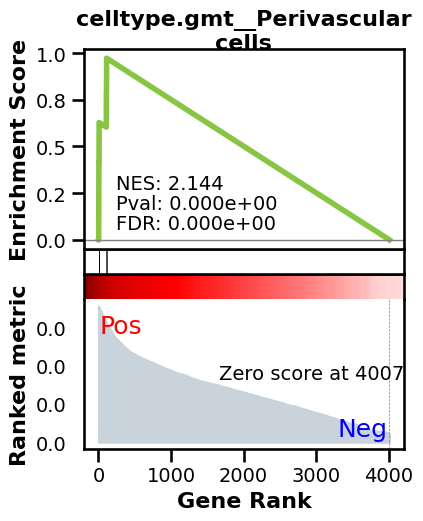

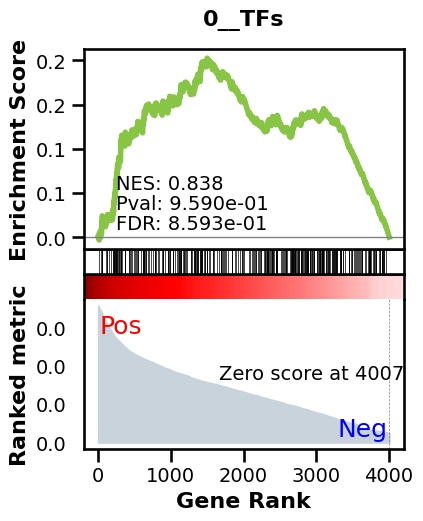

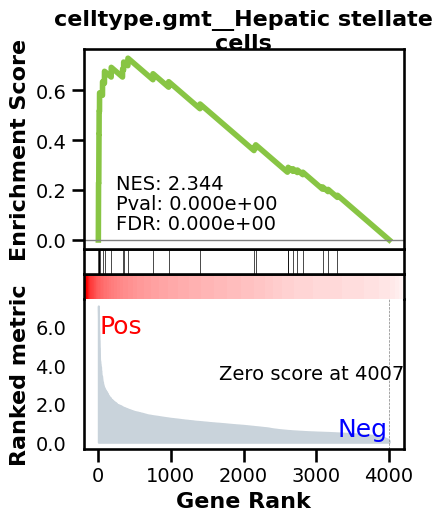

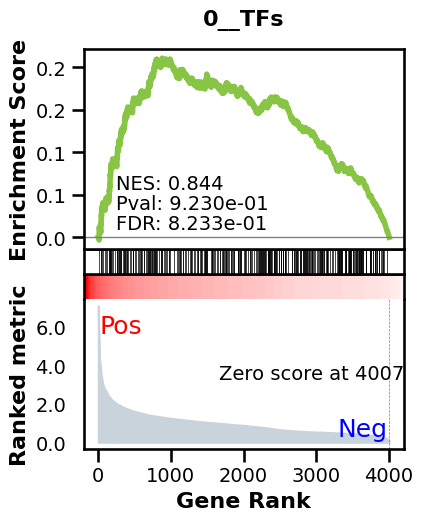

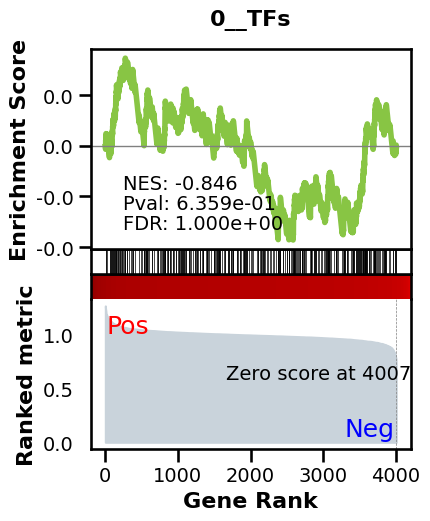

_________________________________________
TF specific enrichment
found some significant results for  4.651162790697675 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2862 genes
intersection pct: 0.7140718562874252
precision:  0.002396545797564769 
recall:  0.3199787943047561 
random precision: 0.0016125679668576004


 99%|█████████████████████████████████████████████████████████████████████████████████▎| 127/128 [00:04<00:00, 29.66it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:747: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████████████████████████████████████████████████████████████████████████████| 128/128 [00:04<00:00, 29.53it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0017992505717515372
EPR: 0.9862260573646389


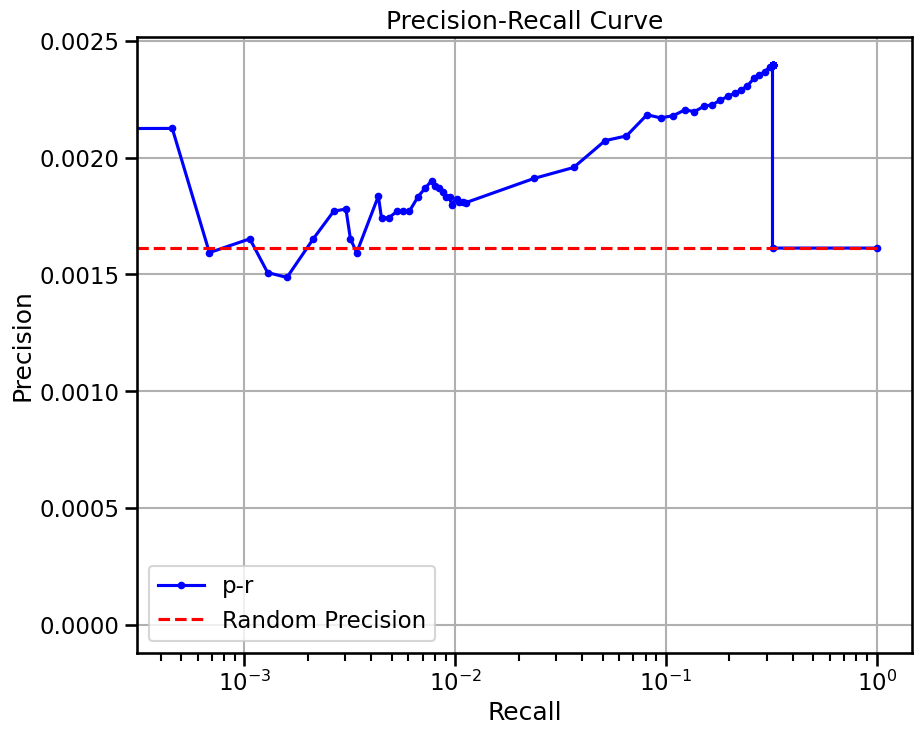

In [8]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS, adata.var.index.isin(
        genes) & adata.var.index.isin(to_use)]
    print(celltype)
    print("")
    print(subadata)
    genie_grn = compute_genie3(
        subadata, nthreads=20, regulators=adata.var[adata.var.isTF].index.tolist())
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_tf_'+celltype] = BenGRN(genie_grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    genie_grn = compute_genie3(subadata, nthreads=20)
    genie_grn.var.index = make_index_unique(
        genie_grn.var['symbol'].astype(str))
    metrics['genie3_'+celltype] = BenGRN(genie_grn,
                                         do_auc=True, doplot=True).scprint_benchmark()

In [9]:
metrics

{'genie3_tf_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Melanocytes',
   'celltype.gmt__Enteric neurons',
   'celltype.gmt__Kupffer cells',
   'celltype.gmt__Hepatoblasts'],
  'TF_enr': True,
  'enriched_terms_Targets': ['celltype.gmt__Melanocytes'],
  'significant_enriched_TFtargets': 9.67741935483871,
  'precision': 0.004696999218443849,
  'recall': 0.3367867514323836,
  'rand_precision': 0.001085814360770578,
  'auprc': 0.0025939734220975525,
  'epr': 5.621543298855217},
 'genie3_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__-intercalated cells (Collecting duct system)',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Connecting tubule cells',
   'celltype.gmt__Hepatic stellate cells',
   'celltype.gmt__Podocytes',
   'celltype.gmt__Cholangiocyt

In [10]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name        EPR     AUPRC  \
0     kidney distal convoluted tubule epithelial cell   5.621543  0.002594   
1     kidney distal convoluted tubule epithelial cell   1.447078  0.001081   
2   kidney loop of Henle thick ascending limb epit...   3.757566  0.003180   
3   kidney loop of Henle thick ascending limb epit...   0.488928  0.001191   
4               kidney collecting duct principal cell   9.972886  0.004970   
5               kidney collecting duct principal cell   1.222447  0.001454   
6                                      mesangial cell   7.436545  0.002789   
7                                      mesangial cell   0.844504  0.001232   
8                     blood vessel smooth muscle cell   7.325135  0.005064   
9                     blood vessel smooth muscle cell   1.076775  0.001795   
10                                           podocyte   6.062939  0.004950   
11                                           podocyte   0.995214  0.001545   
12                                         macrophage   6.882897  0.004367   
13                                         macrophage   1.077567  0.001428   
14                                          leukocyte  13.961202  0.005625   
15                                          leukocyte   1.379121  0.001671   
16                     kidney interstitial fibroblast   8.167462  0.006199   
17                     kidney interstitial fibroblast   0.986226  0.001799   

        RAND    TF_targ  TF_enr  TF_only  
0   0.001086   9.677419    True     True  
1   0.001086   6.451613   False    False  
2   0.001211   0.000000    True     True  
3   0.001211   5.000000   False    False  
4   0.001392   5.714286    True     True  
5   0.001392   1.428571   False    False  
6   0.001223   4.761905    True     True  
7   0.001223   0.000000   False    False  
8   0.001645   1.886792    True     True  
9   0.001645   3.773585   False    False  
10  0.001521   0.000000    True     True  
11  0.001521   6.382979   False    False  
12  0.001401   0.000000    True     True  
13  0.001401   4.878049   False    False  
14  0.001420   0.000000    True     True  
15  0.001420  10.526316   False    False  
16  0.001613   6.976744    True     True  
17  0.001613   4.651163   False    False